In [1]:
%matplotlib inline

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DEBUG_PRINT=True  # Turn this to false to silence all print statements. (A good idea if you have lots of points.)
def LOG(*args):
    if DEBUG_PRINT: print ' '.join([str(x) for x in args])

**Goal:** For each point in a list, find the set of points that are within `desired_range` of that point.

You can reframe this problem as finding all overlapping circles from the set of circles with radius `desired_range` centered around each of the points.

In [4]:
# INPUTS
points = [(2.,4.), (3.5,1.), (3.,4.2), (6.,3.8),(7.75,5.0)]
#import random
#points = [(random.uniform(0.,50.), random.uniform(0.,50.)) for x in range(0,1000)]
desired_range = 1

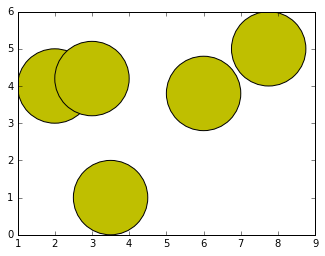

In [5]:
# A convenience function to make it easier to visualize the algorithm.
def plot_circles(points, radius):
    plt.axes()

    for point in points:
        circle = plt.Circle((point), radius=radius, fc='y')
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
plot_circles(points, desired_range)

In [6]:
def MinEdge(pt, axis, radius):
    return pt[axis] - radius
def MaxEdge(pt, axis, radius):
    return pt[axis] + radius

In [7]:
def OverlapInX(points, desired_range):
    return OverlapIn(points, 0, desired_range)
def OverlapInY(points, desired_range):
    return OverlapIn(points, 1, desired_range)
def OverlapIn(points, axis, desired_range):
    from collections import defaultdict
    projections = sorted(points, key=lambda pt: pt[axis])         # Holds list of points being considered
    active_points = [projections[0]]  # Holds list of points being considered
    possible_collisions = []  # Holds all points overlapping when projected onto axis.

    for pt in projections[1:]:   # Skip 0, cause we put it in active_points already.
        i = 0
        while i < len(active_points):  # Note, both i and active_points change during this loop.
            if MinEdge(pt, axis, desired_range) > MaxEdge(active_points[i], axis, desired_range):
                del active_points[i]
                i -= 1
            else:
                possible_collisions.append((pt, active_points[i]))
                # possible_collisions[active_points[i]].append(pt)
            i += 1
        active_points.append(pt)
    return possible_collisions

In [8]:
possible_collisions_x = OverlapInX(points, desired_range)
LOG(len(possible_collisions_x))
LOG(possible_collisions_x)

4
[((3.0, 4.2), (2.0, 4.0)), ((3.5, 1.0), (2.0, 4.0)), ((3.5, 1.0), (3.0, 4.2)), ((7.75, 5.0), (6.0, 3.8))]


I don't think you *need* to do it for the Y. Instead, I think you just check each of the pairs for overlap in the Y? It does seem like there's an even more efficient way to do this? Like, maybe you want sets of overlapping things, not just pairs? Not sure though.

In [9]:
# Don't need to check for the Ys, but it would look like this:
# possible_collisions_y = OverlapInY(points, desired_range)
# LOG(possible_collisions_y)

In [10]:
# Now go through all the X collision pairs and filter out only the ones that also overlap in Y.
possible_collisions_both_axes = []
for a,b in possible_collisions_x:
    min_y = min([a[1],b[1]])
    max_y = max([a[1],b[1]])
    # If they do overlap (bottom of higher point is <= top of lower point)
    if max_y - desired_range <= min_y + desired_range:
        possible_collisions_both_axes.append((a,b))
LOG(possible_collisions_both_axes)

[((3.0, 4.2), (2.0, 4.0)), ((7.75, 5.0), (6.0, 3.8))]


In [11]:
def flatten(l):
    return [item for sublist in l for item in sublist]

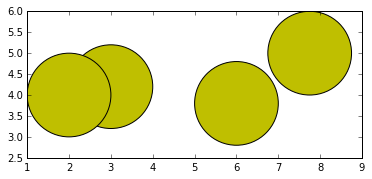

In [12]:
plot_circles(flatten(possible_collisions_both_axes), desired_range)

In [13]:
def TestOverlap(a,b):
    distance_sqrd = (a[0]-b[0])**2 + (a[1]-b[1])**2
    return distance_sqrd <= (2*desired_range)**2

In [14]:
# Now actually test for collisions for all the possibly colliding points!
all_overlaps_by_point = {pt : [] for pt in points}  # maps from a point to all its overlaps
for a,b in possible_collisions_both_axes:
    if TestOverlap(a,b) == True:
        all_overlaps_by_point[a].append(b)
        all_overlaps_by_point[b].append(a)

The result that I've chosen to build above is a map from each point to all the points it overlaps with. I've chosen to leave non-overlapping points as `pt:[]`, but another valid (maybe better) option is to just leave it out of the map if it doesn't overlap with anything.

Here are the results:

In [15]:
LOG(all_overlaps_by_point)

{(3.5, 1.0): [], (6.0, 3.8): [], (7.75, 5.0): [], (2.0, 4.0): [(3.0, 4.2)], (3.0, 4.2): [(2.0, 4.0)]}


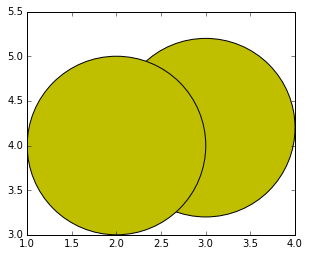

In [16]:
# Plot only the overlapping circles:
plot_circles(flatten(all_overlaps_by_point.values()), desired_range)

In [17]:
all_overlaps_by_point[points[2]]

[(2.0, 4.0)]